# 7. Analyzing Time-Series Data (from columns month, year)

## Containing:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 2.1 New column year_month
### 3. Source quality
#### 3.1 Time series analysis: decomposition
#### 3.2 Testing for stationarity
#### 3.3 Stationarizing the data
### 4. Total deaths missings
#### 4.1 Time series analysis: decomposition
#### 4.2 Testing for stationarity
#### 4.3 Stationarizing the data

# 5. Time Series Forecasting: Total deaths missings

#### 5.1 Defining Parameters
#### 5.2 Splitting the Data
#### 5.3 Running and Fitting the Model

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Define path

path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [4]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'df_mm.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents,coordinates,continent
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.650259, -110.366453",North America
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.59713, -111.73756",North America
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.94026, -113.01125",North America
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4,"31.506777, -109.315632",North America
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4,"59.1551, 28.0",Europe


In [5]:
df_mm.shape

(13493, 26)

In [6]:
df_mm.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'country_origin', 'migration_route',
       'loc_death', 'info_source', 'UNSD_geo_group', 'source_quality',
       'inc_type_num', 'vict_per_incidents', 'coordinates', 'continent'],
      dtype='object')

In [7]:
type(df_mm)

pandas.core.frame.DataFrame

#### 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
# Check for missing values

df_mm.isnull().sum()

# No missing values to handle

main_ID                0
incident_ID            0
inc_type               0
region_inc             0
website_date_new       0
month_num              0
year                   0
tot_dead_miss          0
tot_migrants           0
tot_survive            0
identified_demogr      0
unidentified_demogr    0
latitude               0
longitude              0
reg_origin             0
cause_death            0
country_origin         0
migration_route        0
loc_death              0
info_source            0
UNSD_geo_group         0
source_quality         0
inc_type_num           0
vict_per_incidents     0
coordinates            0
continent              0
dtype: int64

In [9]:
# Duplicates check

dups = df_mm.duplicated()
dups.shape # No dups

(13493,)

#### 2.1 New column year_month

In [10]:
df_mm['year_month'] = pd.to_datetime(df_mm['year'].astype(str) + df_mm['month_num'].astype(str), format='%Y%m')

In [11]:
df_mm.head(5)

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents,coordinates,continent,year_month
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.650259, -110.366453",North America,2014-01-01
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.59713, -111.73756",North America,2014-01-01
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.94026, -113.01125",North America,2014-01-01
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4,"31.506777, -109.315632",North America,2014-01-01
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4,"59.1551, 28.0",Europe,2014-01-01


### 3. Source quality

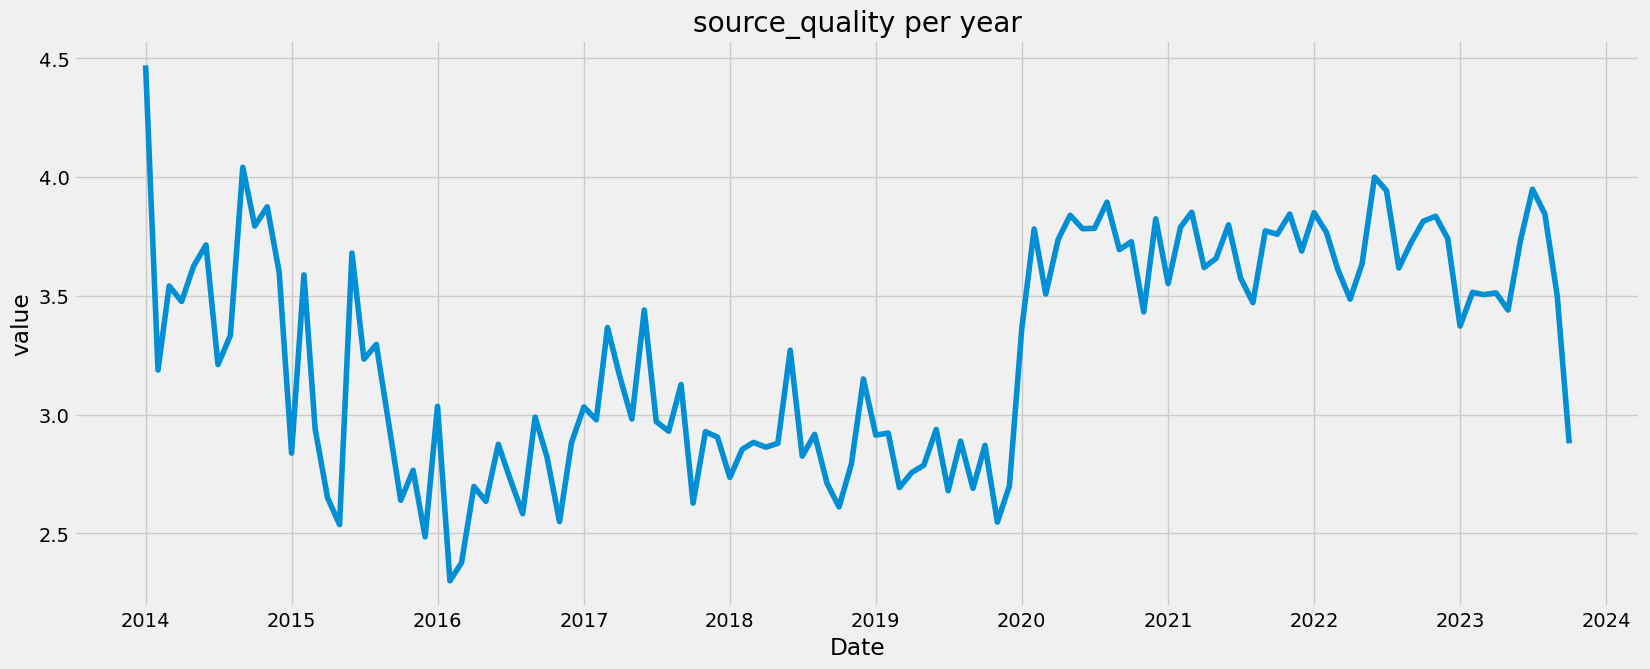

In [12]:
df2 = df_mm.groupby('year_month').agg({'source_quality':['mean']})

plt.figure(figsize=(18,7), dpi=100) 
plt.title('source_quality per year')
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(df2)

#### 3.1 Time series analysis: decomposition

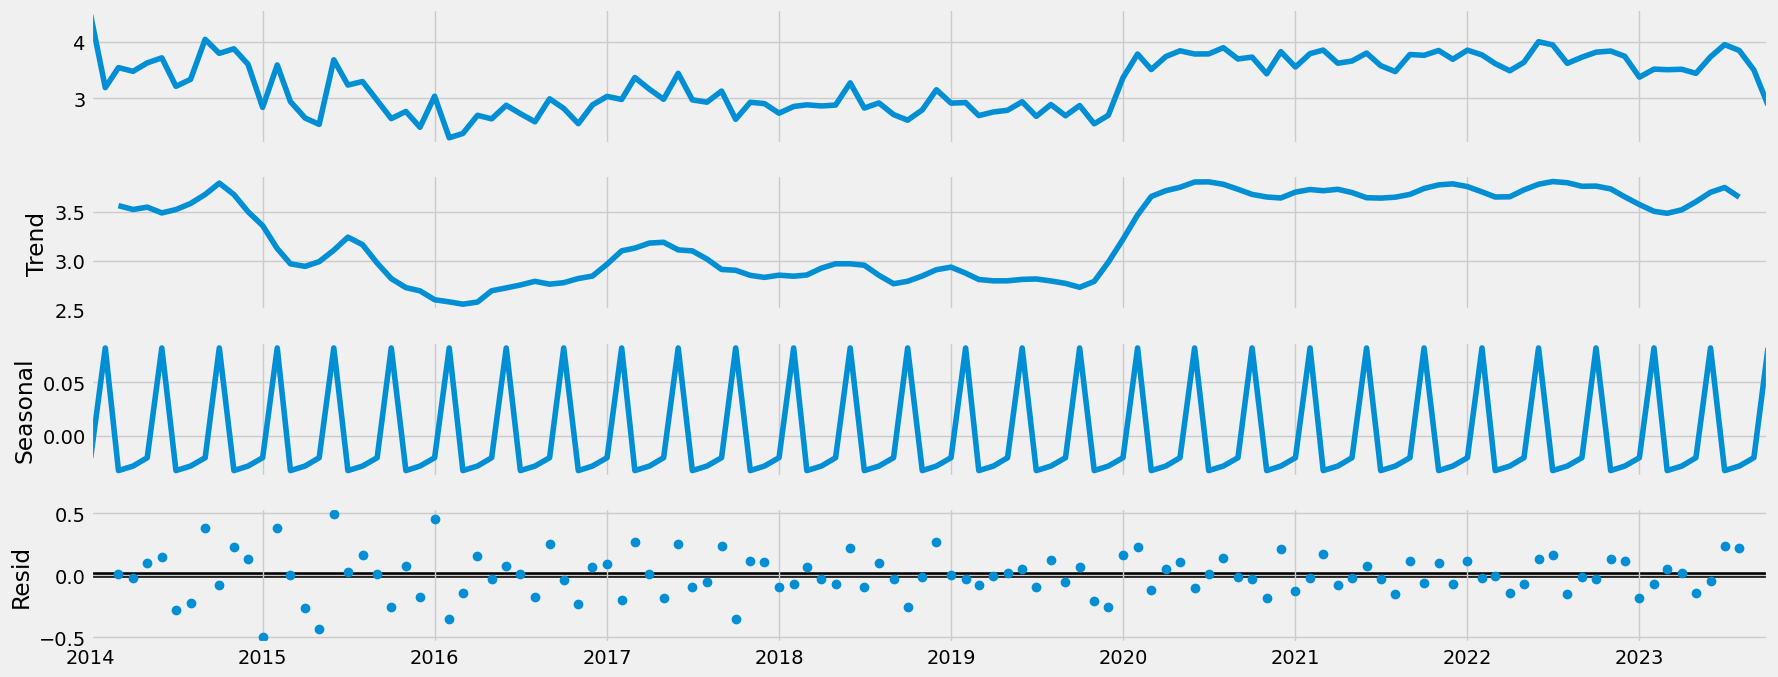

In [19]:
decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period=4)
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

decomposition.plot()
plt.show()

#### Increase in source quality from end of 2019 onwards. Seasonal fluctuations: 3 peaks per year(beginning of year, around April, around Spetember (?). Noise becomes smaller from 2018-2019.  

#### Data doesn't have a regular time interval (e.g., daily, hourly):

it's just a list of dates with different intervals between incidents, so using seasonal_decompose directly is not appropriate. This function is designed for time series data with a known and regular frequency.

In such cases, I need to use different time series analysis techniques that don't rely on a fixed frequency. One approach is to use rolling averages or moving averages to smooth out the data and identify trends or patterns.

#### 3.2 Testing for stationarity

In [20]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['source_quality'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.713964
p-value                          0.071653
Number of Lags Used              1.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


#### Interpretation: p-value > .05, indicating non-stationary data (insignificant test result supporting null hypothesis). Test Statistic is slightly larger than critical value at p<0.05 or .01, hence, null hypothesis (presence of a unit root = data not stationary) can’t be ruled out, data is non-stationary. 

#### Proceed with test for autocorrelation:

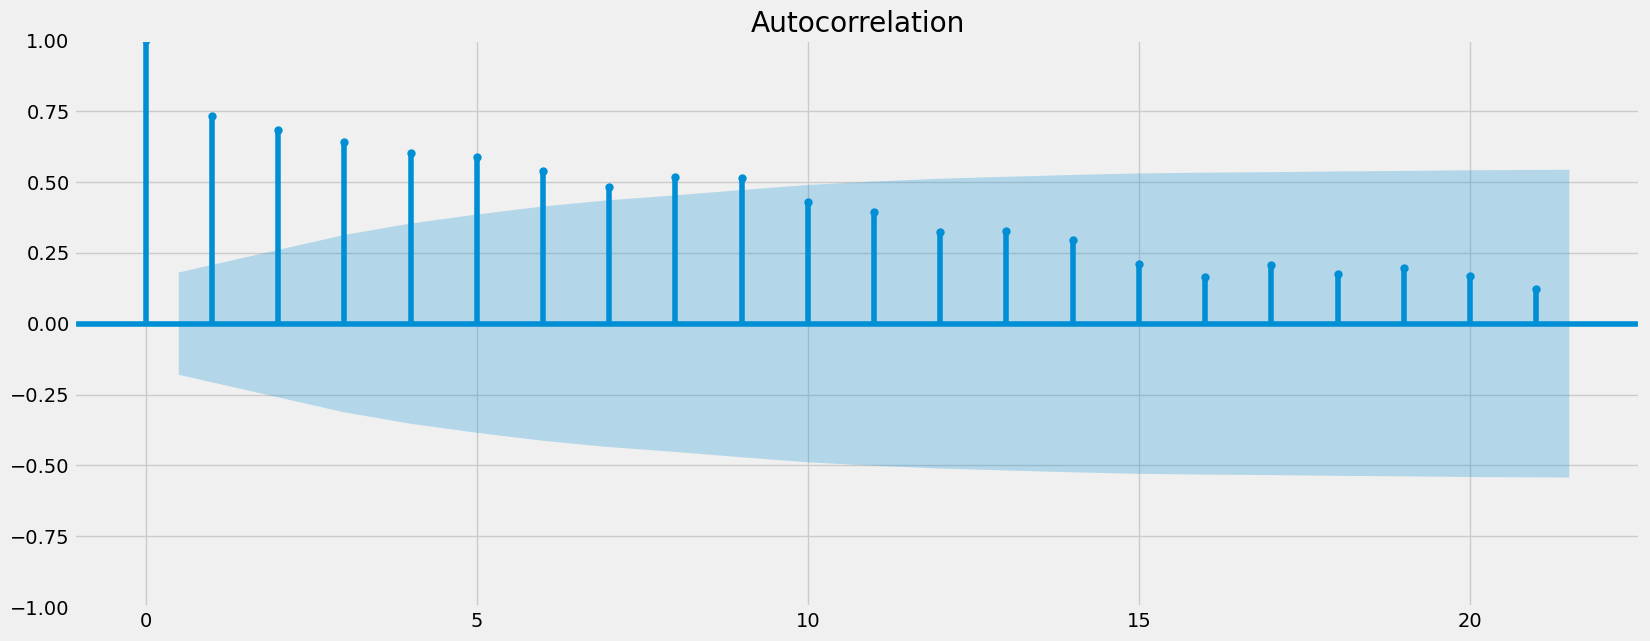

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

#### Interpretation: at least ten significant lags (or ten vertical lines above the confidence interval) for (a second round of) differencing are present.

#### 3.3 Stationarizing

via differencing

In [22]:
# Calculating the difference between every value (t) and its lag (t -1) and storing the results in a new dataframe
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = df2 - df2.shift(1)

In [23]:
data_diff.dropna(inplace = True) # Remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

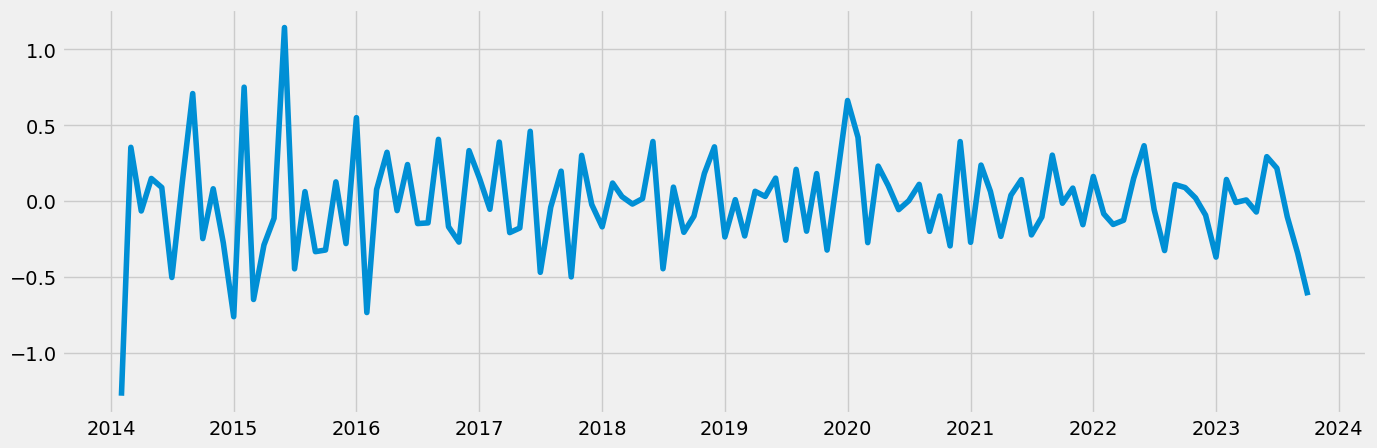

In [24]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
# Testing again for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.042215e+01
p-value                        1.693714e-18
Number of Lags Used            1.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


#### Interpetation: Test statistic significant (<.001), Test Statistic is smaller than critical values. Null hypothesis (presence of a unit root) can be ruled out: data is stationary now.

"-1.042215e+01" means -1.042215 multiplied by 10 raised to the power of 1 = -10.

"-2.887020e+00" means -2.887020 multiplied by 10 raised to the power of 0 = -2.887020 

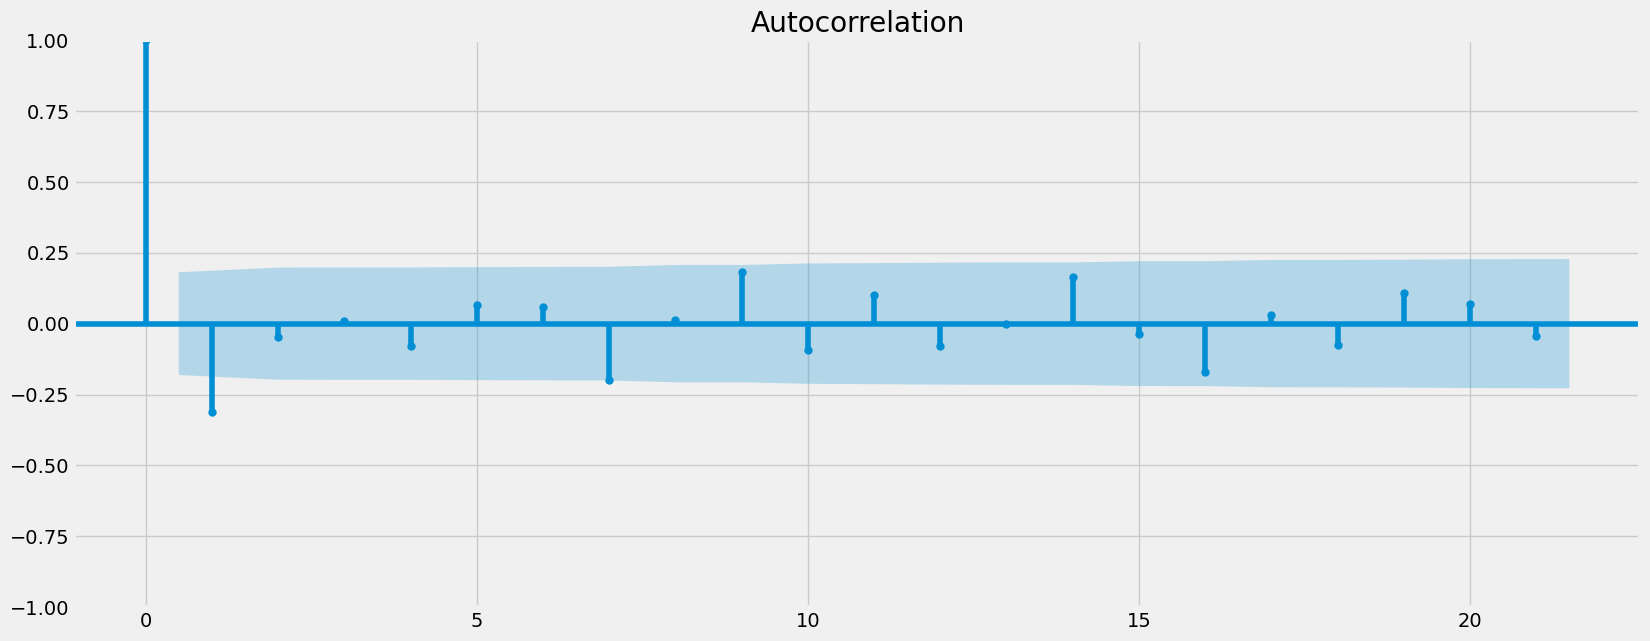

In [26]:
plot_acf(data_diff)
plt.show()

#### No significant lags (vertical lines above the confidence interval). No autocorrelation. Stationarity is stable.

### 4. Total deaths missings

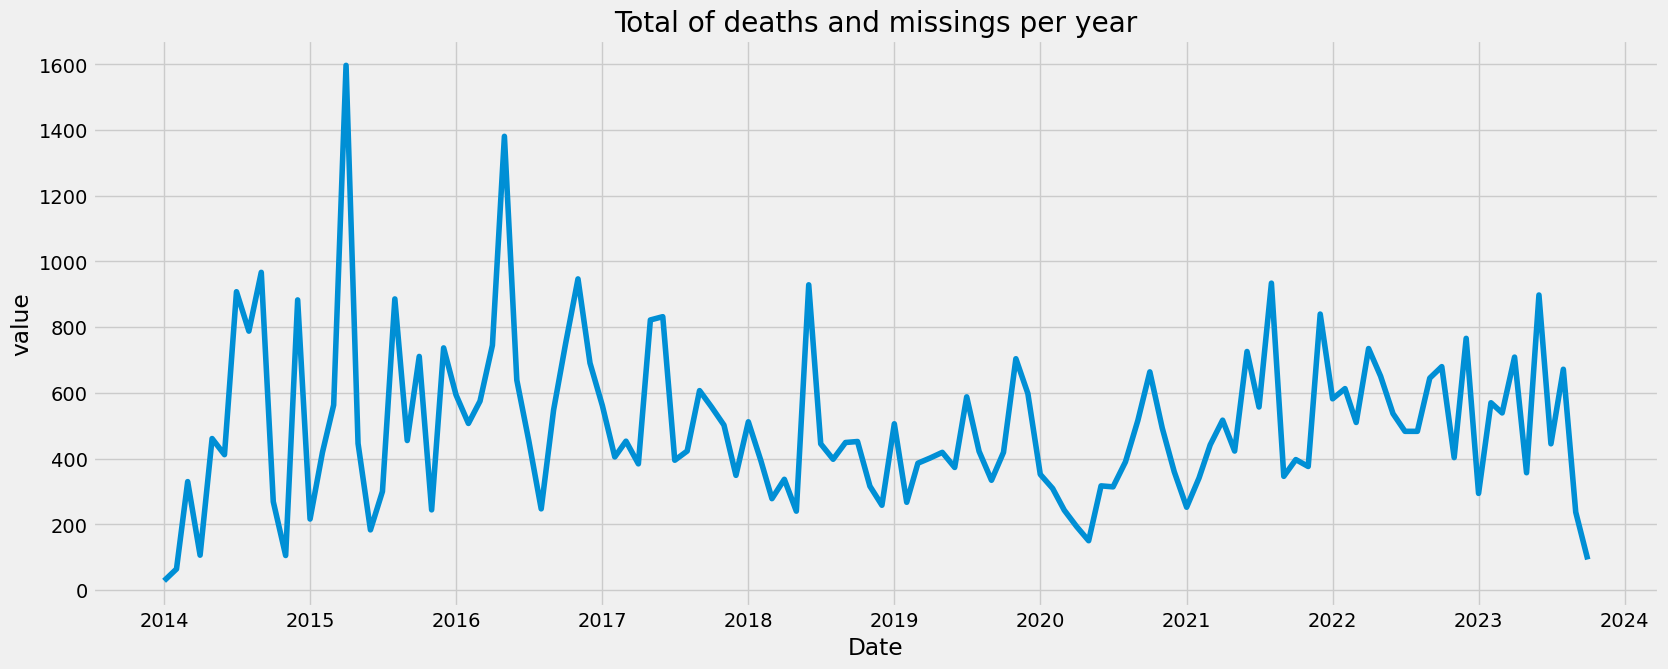

In [27]:
df3 = df_mm.groupby('year_month').agg({'tot_dead_miss':['sum']}) #count: N incidents per month, mean/median: central tendencies of N deaths/missings per month

plt.figure(figsize=(18,7), dpi=100) 
plt.title('Total of deaths and missings per year')
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(df3)

#### 4.1 Time series analysis: decomposition

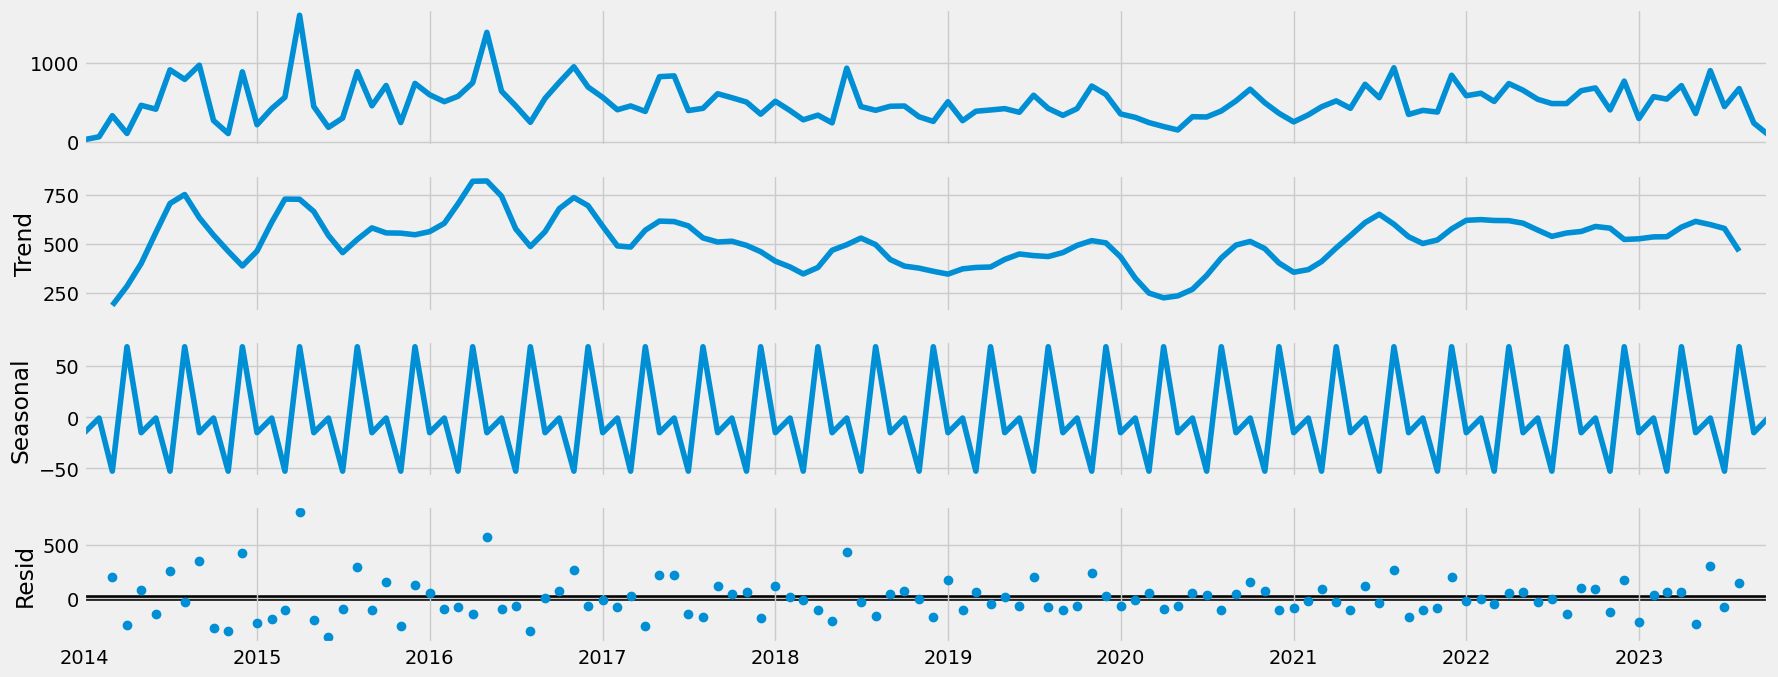

In [28]:
decomposition = sm.tsa.seasonal_decompose(df3, model='additive', period=4)
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

decomposition.plot()
plt.show()

#### Interpretation: there is no indication of a trend, but cycles: rises and falls that aren’t fixed to an even time interval. There is seasoality (3 peaks per year with smaller peaks after each max). Noise becomes slightly smaller across years.

#### 4.2 Testing for stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df3['tot_dead_miss'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.691119
p-value                          0.435694
Number of Lags Used             13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


#### Interpetation: p-value indicates non-significant test results, null hypothesis (non-stationary data) cannot be ruled out. Test Statistic is larger than Critical Values, likewise indicating that null hypothesis cannot be ruled out. Hence, data is non-stationary.

#### Proceed with testing autocorrelation:

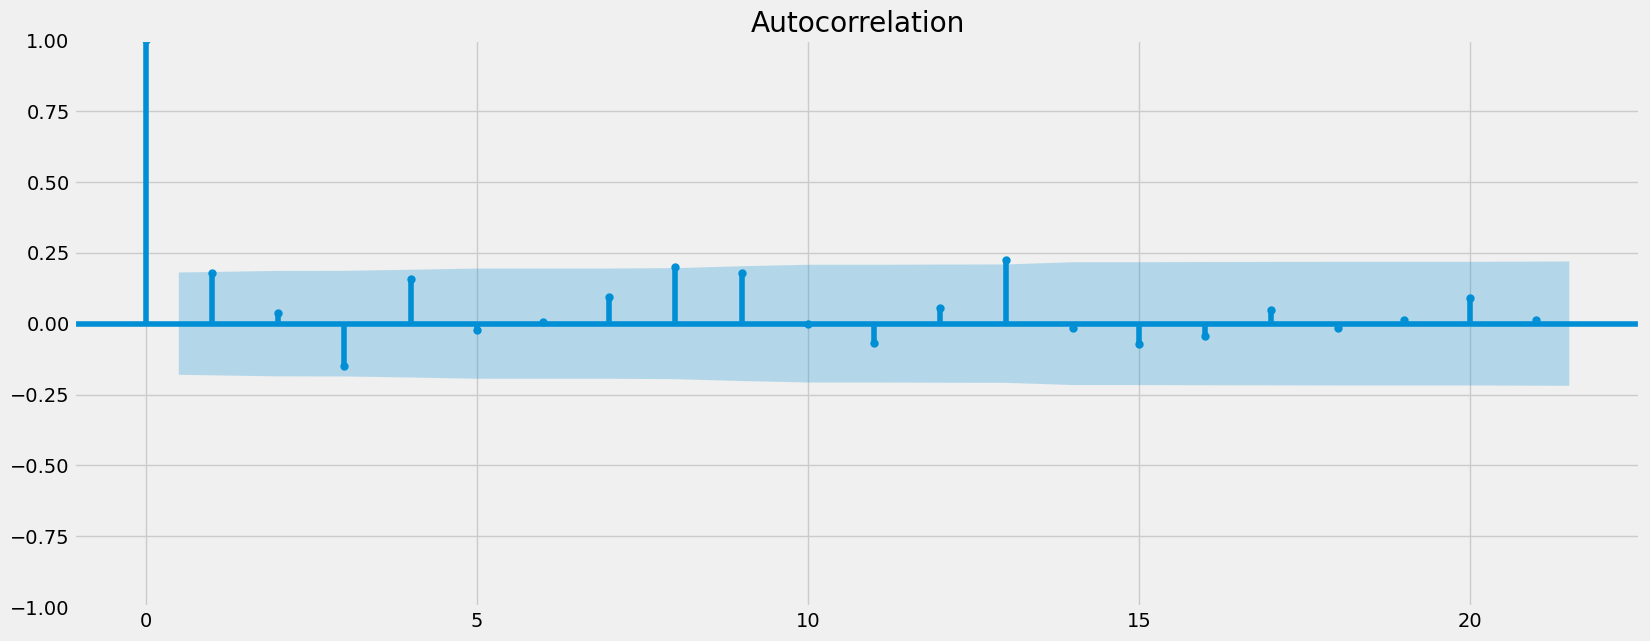

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df3)
plt.show()

#### Indicates no autocorrelation. Non-stationarity is weak.

#### 4.3 Stationarizing the data

via differencing

In [31]:
data_diff_2 = df3 - df3.shift(1)

In [32]:
data_diff_2.dropna(inplace = True)

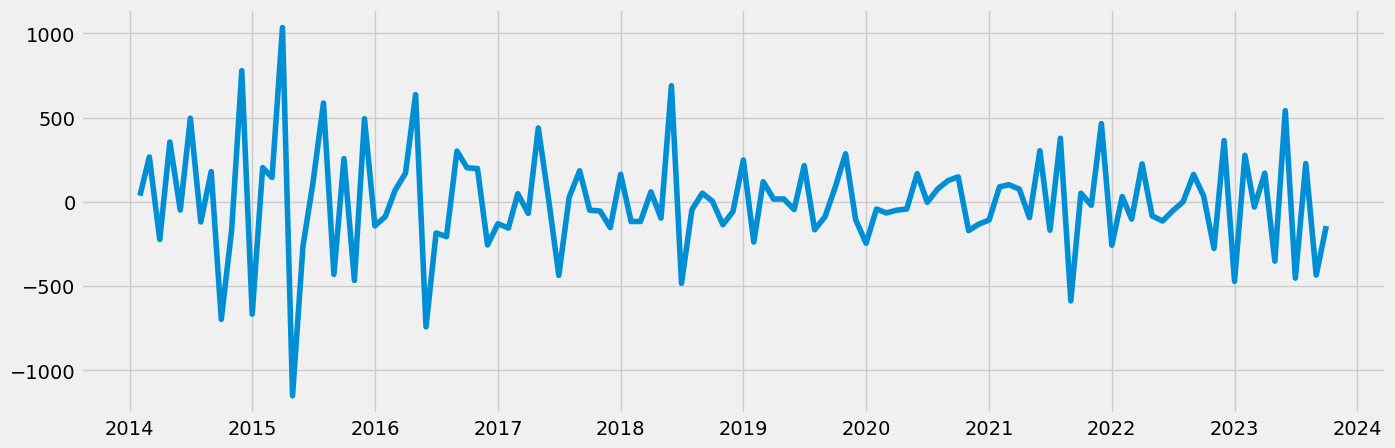

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [34]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.534225
p-value                          0.007150
Number of Lags Used             12.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


#### Interpretation: Test Statistic is significant (< 0.05) and smaller than Critical Values: Null hypothesis can be rejected. Data is stationary now after one round of stationarizing.

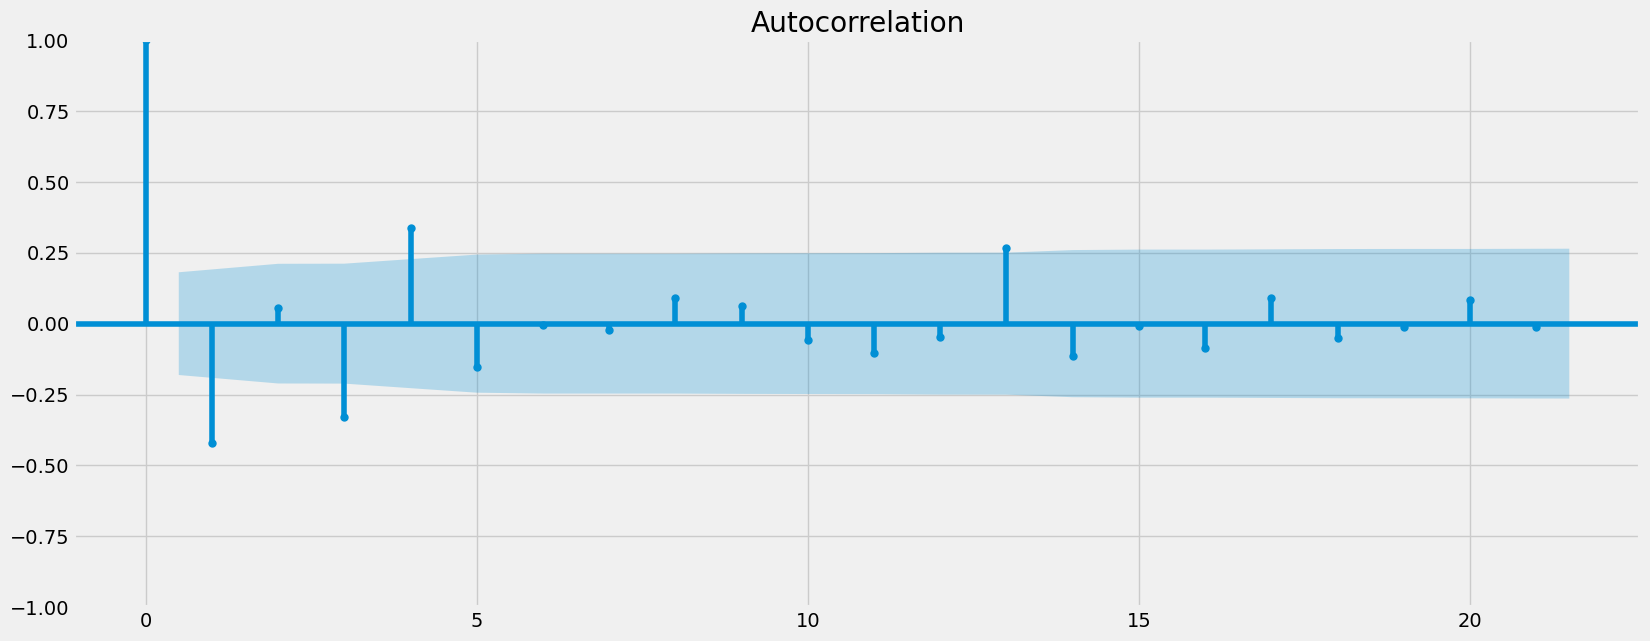

In [35]:
plot_acf(data_diff_2)
plt.show()

#### No significant lags (vertical lines above the confidence interval). No autocorrelation. Stationarity is stable. 

*However: there are now more vertical lines above the confidence intervall. Hence, there is more autocorrelation after stationarizing?*

# Time Series Forecasting: Total deaths missings

#### 5.1 Defining Parameters

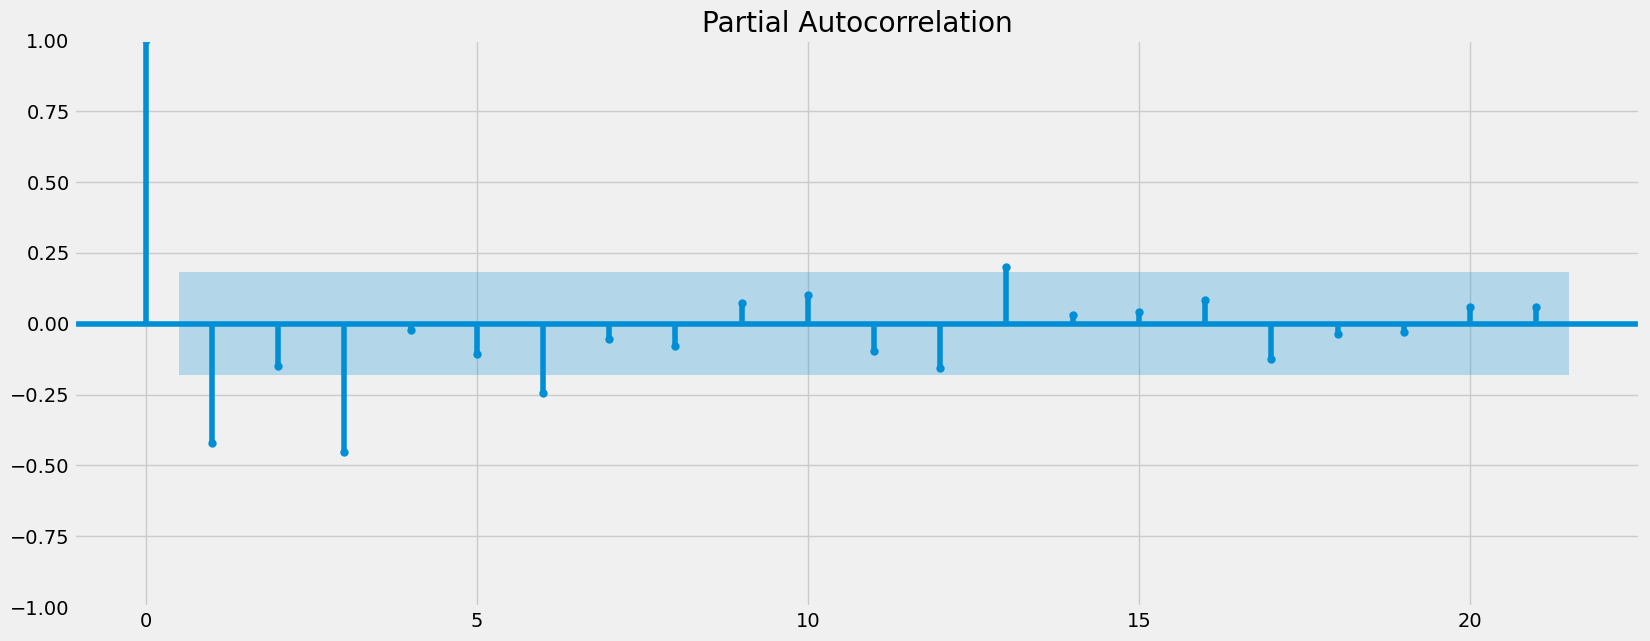

<Figure size 4500x4500 with 0 Axes>

In [36]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff_2)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

#### 1 positive partial autocorrelation, *p*=1

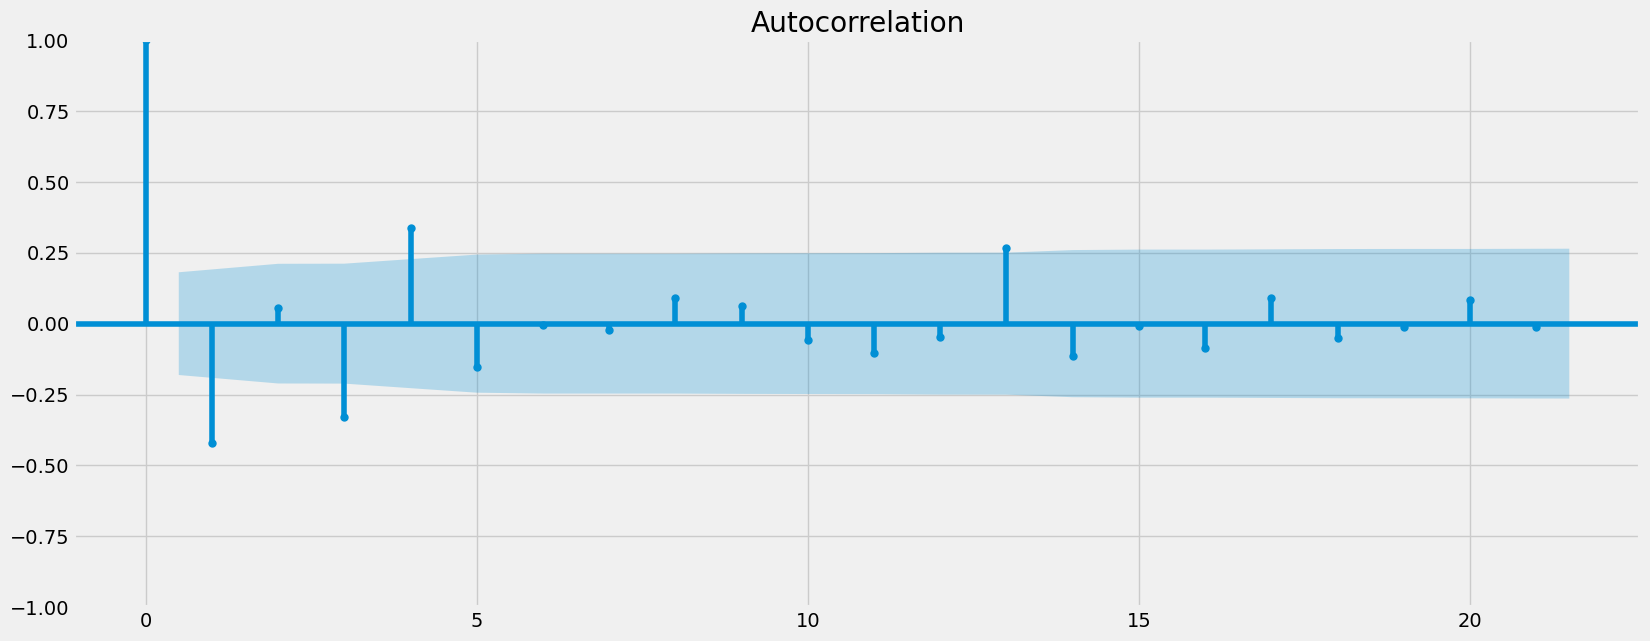

<Figure size 1500x500 with 0 Axes>

In [37]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff_2)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

#### 1 positive autocorrelation, *q*=1

### 2. Splitting the Data

In [49]:
# Splitting the data 30:70, maintaining the chronological order

data_len = len(data_diff_2)
split_percentage = 0.7  # 70% for training

split_index = int(data_len * split_percentage)

train = data_diff_2['tot_dead_miss'][:split_index]
test = data_diff_2['tot_dead_miss'][split_index:]

In [39]:
train.head()

,sum
year_month,
2014-02-01,36.0
2014-03-01,266.0
2014-04-01,-224.0
2014-05-01,355.0
2014-06-01,-49.0


In [40]:
train.shape

(81, 1)

In [41]:
test.shape

(36, 1)

In [42]:
data_diff_2.shape

(117, 1)

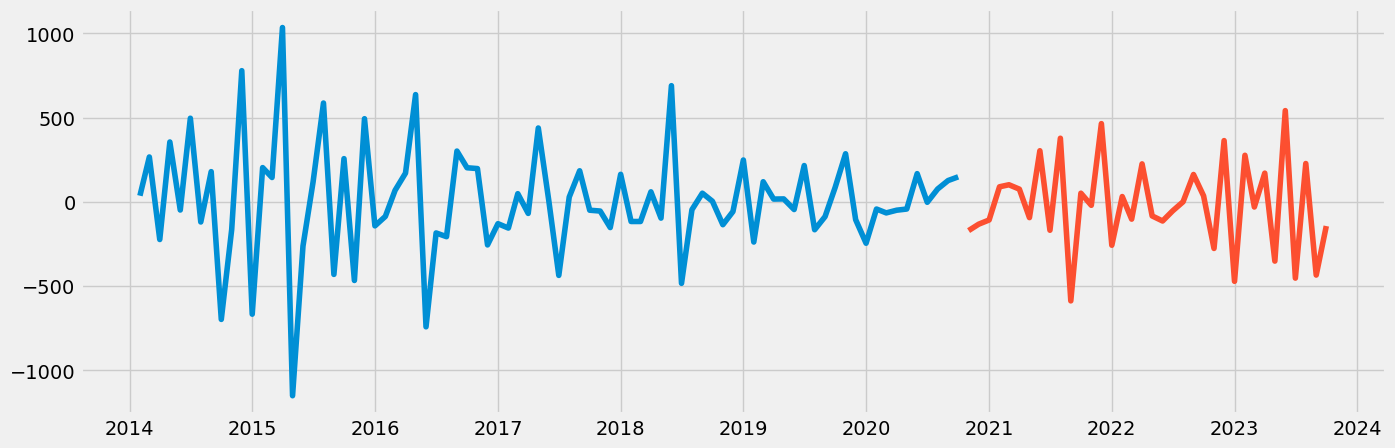

In [43]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

### 3. Running and Fitting the Model

In [51]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [52]:
model = sm.tsa.ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()

#print(fitted.summary()) # Check model summary

# Forecast
#fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set
#you are expected three columns from fitted.forecast, but this function, in the newest version can return only two columns:
fitted.forecast (41, alpha=0.05)

2020-11-01   -42.164100
2020-12-01    24.707779
2021-01-01     1.192046
2021-02-01     9.461436
2021-03-01     6.553476
2021-04-01     7.576070
2021-05-01     7.216471
2021-06-01     7.342926
2021-07-01     7.298458
2021-08-01     7.314095
2021-09-01     7.308596
2021-10-01     7.310530
2021-11-01     7.309850
2021-12-01     7.310089
2022-01-01     7.310005
2022-02-01     7.310034
2022-03-01     7.310024
2022-04-01     7.310028
2022-05-01     7.310026
2022-06-01     7.310027
2022-07-01     7.310027
2022-08-01     7.310027
2022-09-01     7.310027
2022-10-01     7.310027
2022-11-01     7.310027
2022-12-01     7.310027
2023-01-01     7.310027
2023-02-01     7.310027
2023-03-01     7.310027
2023-04-01     7.310027
2023-05-01     7.310027
2023-06-01     7.310027
2023-07-01     7.310027
2023-08-01     7.310027
2023-09-01     7.310027
2023-10-01     7.310027
2023-11-01     7.310027
2023-12-01     7.310027
2024-01-01     7.310027
2024-02-01     7.310027
2024-03-01     7.310027
Freq: MS, Name: 

In [55]:
model = sm.tsa.ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

# Forecast
result = fitted.get_forecast(36, alpha = 0.05).summary_frame()
print(result)

# Turn into pandas series
fc_series = pd.Series(result['mean_se'].values, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(result['mean_ci_lower'].values, index=test.index) # Lower bound of the confidence interval
upper_series = pd.Series(result['mean_ci_upper'].values, index=test.index) # Upper bound of the confidence interval

sum              mean     mean_se  mean_ci_lower  mean_ci_upper
2020-11-01 -42.164100  311.108999    -651.926533     567.598332
2020-12-01  24.707779  328.516620    -619.172965     668.588522
2021-01-01   1.192046  331.049127    -647.652321     650.036412
2021-02-01   9.461436  331.205192    -639.688811     658.611684
2021-03-01   6.553476  331.279265    -642.741953     655.848904
2021-04-01   7.576070  331.269162    -641.699557     656.851698
2021-05-01   7.216471  331.274687    -642.069984     656.502927
2021-06-01   7.342926  331.272989    -641.940201     656.626052
2021-07-01   7.298458  331.273616    -641.985900     656.582815
2021-08-01   7.314095  331.273400    -641.969838     656.598027
2021-09-01   7.308596  331.273477    -641.975488     656.592680
2021-10-01   7.310530  331.273450    -641.973502     656.594561
2021-11-01   7.309850  331.273460    -641.974201     656.593900
2021-12-01   7.310089  331.273457    -641.973956     656.594134
2022-01-01   7.310005  331.273459    -64

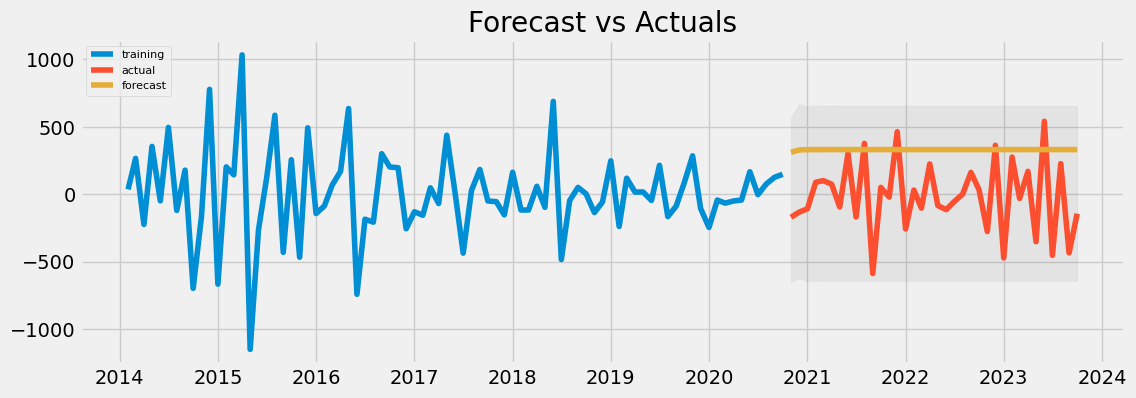

In [56]:
# Create Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                    sum   No. Observations:                   81
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -574.641
Date:                Mon, 13 Nov 2023   AIC                           1155.282
Time:                        10:53:33   BIC                           1162.429
Sample:                    02-01-2014   HQIC                          1158.148
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3517      0.066     -5.334      0.000      -0.481      -0.222
ma.L1         -0.9999      0.121     -8.270      0.000      -1.237      -0.763
sigma2      9.561e+04   1.26e-06   7.56e+10      0.0

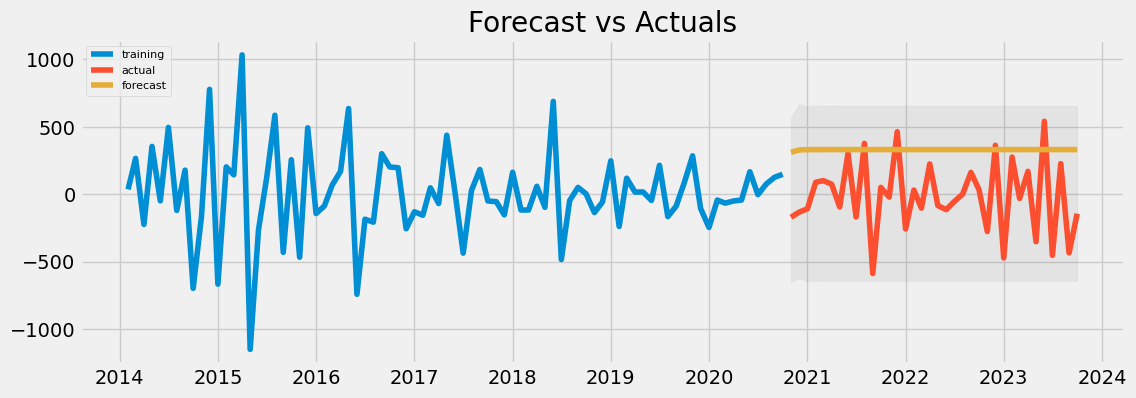

In [57]:
# Whole model incl plot

model = sm.tsa.ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary! Request model output
result = fitted.get_forecast(36, alpha =0.05).summary_frame()
fc_series = pd.Series(result['mean_se'].values, index=test.index)
lower_series = pd.Series(result['mean_ci_lower'].values, index=test.index)
upper_series = pd.Series(result['mean_ci_upper'].values, index=test.index)
# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) 
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Interpretation: Model summary shows results of AR and MA terms are statistically significant. Plot indicates that forecast line is within CI of forecast. No iteration needed.

#### In the code above, I've fitted an ARIMA model to the training data and generated a forecast for the next 36 time points using the get_forecast method. The forecasted values are stored in fc_series, and the lower and upper confidence intervals are stored in lower_series and upper_series, respectively.

#### To make a forecast into the future beyond the existing data, I extend the time index and plot the forecast along with the historical data. 

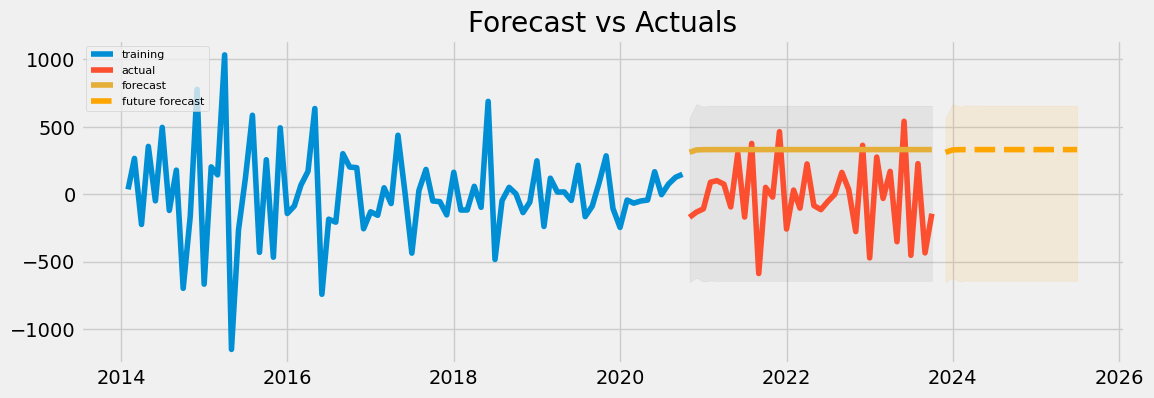

In [64]:
# Assuming you have already run the code you provided

# Number of future time points you want to forecast
future_steps = 20

# Extend the time index for the forecasted period
future_index = pd.date_range(start=test.index[-1], periods=future_steps+1, freq='M')[1:] # 'D'=day, 'M'=month

# Generate the forecast for the future time points
future_result = fitted.get_forecast(steps=future_steps, alpha=0.05).summary_frame()
future_fc_series = pd.Series(future_result['mean_se'].values, index=future_index)
future_lower_series = pd.Series(future_result['mean_ci_lower'].values, index=future_index)
future_upper_series = pd.Series(future_result['mean_ci_upper'].values, index=future_index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(future_fc_series, label='future forecast', linestyle='dashed', color='orange')  # Plot future forecast
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.fill_between(future_lower_series.index, future_lower_series, future_upper_series, color='orange', alpha=.1)  # Fill for future forecast
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### The modified plot now includes the historical data, the original forecast, and the forecast into the future. The dashed line represents the forecasted values for the future, and the shaded area represents the confidence intervals for the future forecast. 

#### The total number of deaths and missings is expected to be on a high level around 400 per month, for the next 20 months.